In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
import data
import matplotlib.dates as mdates
import warnings
import csv
import deconvolution
import datetime
from covid_forecast import *
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
matplotlib.rcParams['figure.figsize'] = (10., 6.)
palette = plt.get_cmap('tab10')
import matplotlib.ticker as mtick
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)

In [6]:
# SEIR approach -- didn't help
# def infer_initial_data(cum_deaths,data_start,ifr,gamma,N,method='deconvolution',extended_output=False):
#     a = 1./5
#     daily_deaths = np.diff(cum_deaths); daily_deaths = np.insert(daily_deaths,0,cum_deaths[0])

#     pdf = deconvolution.generate_pdf()
#     offset1 = deconvolution.get_offset(pdf,threshold=0.10)
#     offset2 = get_mttd(daily_deaths)
#     offset = int(round(0.5*(offset1+offset2)))
#     inf_daily_exposures, _ = deconvolution.infer_infections(daily_deaths,pdf,ifr)
#     inferred_data_dates = np.arange(data_start,data_start+len(cum_deaths))
#     assert(len(inferred_data_dates)==len(inf_daily_exposures))

#     cum_recovered = np.zeros_like(inferred_data_dates)
#     active_infections = np.zeros_like(inferred_data_dates)
#     active_exposed = np.zeros_like(inferred_data_dates)
#     active_exposed[0] = inf_daily_exposures[0]
    
#     for i in range(1,len(inferred_data_dates)):
#         active_exposed[i] = (1-a)*active_exposed[i-1] + inf_daily_exposures[i]
#         active_infections[i] = (1-gamma)*active_infections[i-1] + a*active_exposed[i-1]
#         cum_recovered[i] = cum_recovered[i-1] + gamma*active_infections[i-1]    
    
#     # Initial values, offset+1 days ago
#     I0 = active_infections[-(offset+1)]
#     R0 = cum_recovered[-(offset+1)]
#     u0 = np.array([N-I0-R0,I0,R0])
#     if extended_output:
#         return u0, offset, inferred_data_dates, active_infections, cum_recovered, inf_daily_exposures
#     else:
#         return u0, offset, inferred_data_dates


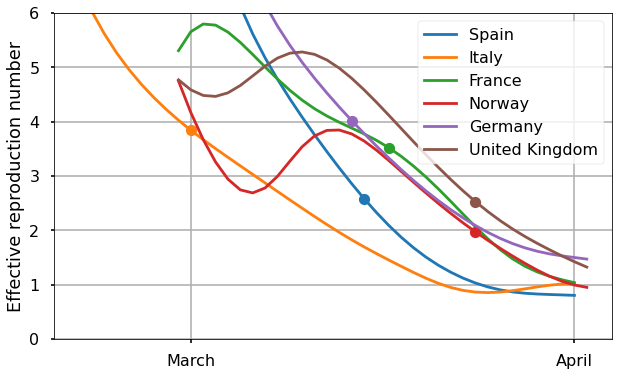

In [31]:
for ii, region in enumerate(['Spain','Italy','France','Norway','Germany','United Kingdom']):
    N = data.get_population(region)
    smooth = False
    pdf = deconvolution.generate_pdf(8.,17/8.)
    gamma = np.sum(pdf)/np.sum(pdf*np.arange(len(pdf)))
    #gamma = 0.14
    ifr = avg_ifr(region)
    
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    daily_cases = np.insert(np.diff(cum_cases),0,cum_cases[0])

    u0, offset, inf_dates, I, R, delta_I = \
            infer_initial_data(cum_deaths,data_start,ifr,gamma,N,method='deconvolution',extended_output=1,pdf=pdf)
    
    S = N - I - R
    shift = 0
    beta_obs = delta_I[:]*N/(I[shift:]*S[shift:])
    if region=='Italy':
        start=30
        ld = '03-01-2020'
    elif region=='Austria':
        start=42
    else:
        start=38
        ld = data.lockdown_start[region][0]
        
    plt.plot_date(data_dates[start:-offset-shift],beta_obs[start:-offset]/gamma,'-',label=region)
    
    #for ld in data.lockdown_start[region]:
    lockdown_date = datetime.strptime(ld,'%m-%d-%Y')
    i = np.where(np.array([datetime.strftime(d,'%m-%d-%Y') for d in data_dates])==ld)
    plt.plot_date([lockdown_date],beta_obs[i]/gamma,'o',color=palette(ii))
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
    plt.ylim(0,6)
    plt.ylabel('Effective reproduction number')
    plt.grid(True)
    plt.legend()
    plt.savefig('eff_R.pdf')

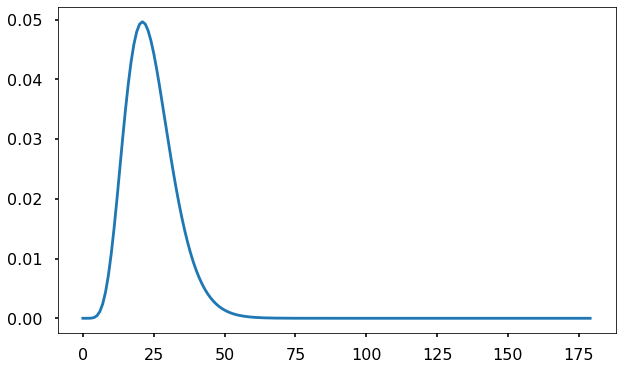

In [11]:
plt.plot(pdf)

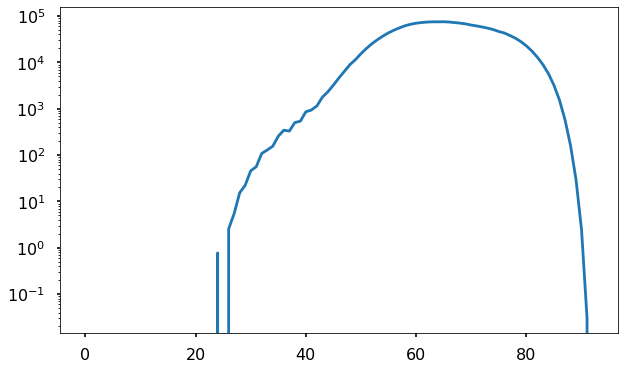

In [36]:
plt.semilogy(delta_I)

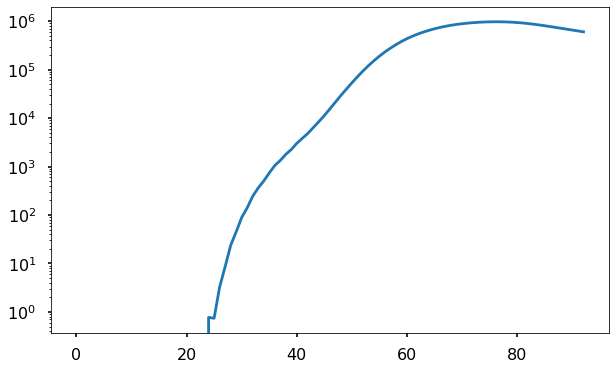

In [37]:
plt.semilogy(I)

In [85]:
offset

23

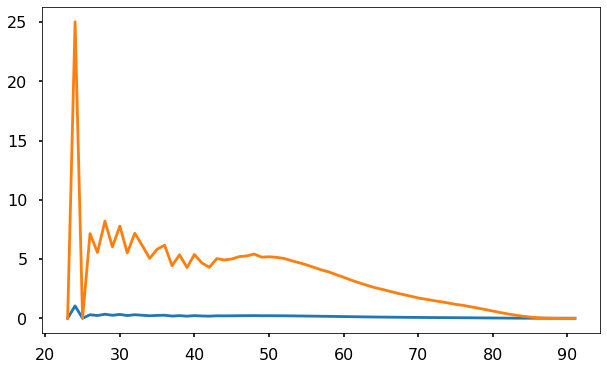

In [43]:
shift=1
plt.plot(delta_I[:-shift]/I[shift:])
plt.plot(delta_I[:-shift]*N/(I[shift:]*S[shift:])/gamma)

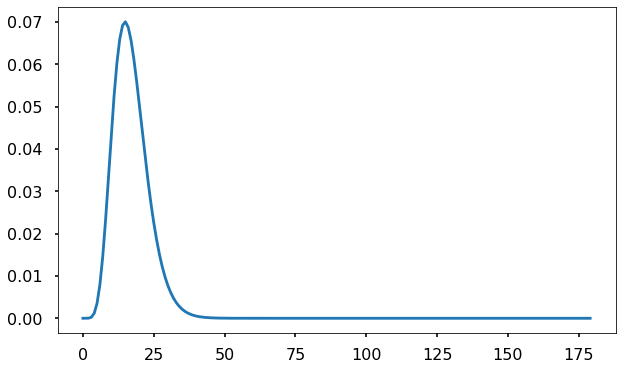

In [34]:
pdf = deconvolution.generate_pdf(8.,17/8.)
plt.plot(pdf)

In [30]:
gamma = np.sum(pdf)/np.sum(pdf*np.arange(len(pdf)))
gamma

0.04000000000322474

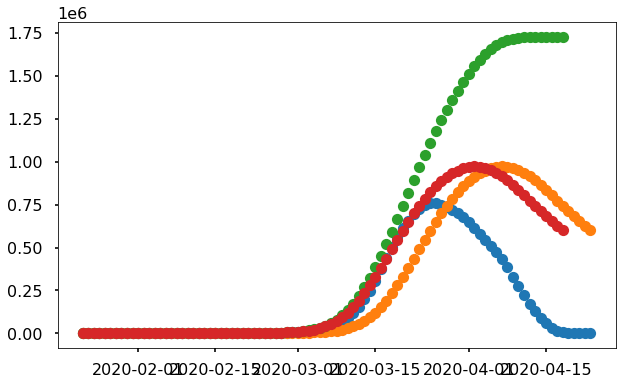

In [31]:
plt.plot_date(data_dates,delta_I*10)
plt.plot_date(data_dates,I)
plt.plot_date(data_dates[:-shift],np.cumsum(delta_I[shift:]))
plt.plot_date(data_dates[:-shift],I[shift:])

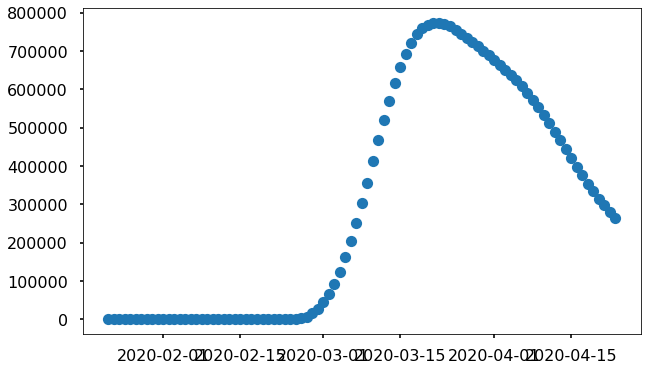

In [67]:
plt.plot_date(data_dates,I)

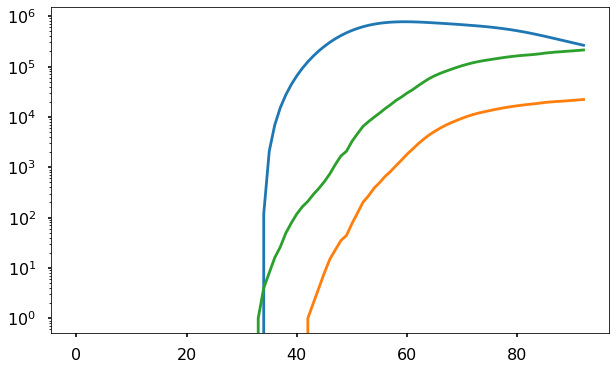

In [72]:
plt.semilogy(I)
plt.semilogy(cum_deaths)
plt.semilogy(cum_cases)

In [70]:
I

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.18100652e+02, 2.08385860e+03,
       6.91638323e+03, 1.51474481e+04, 2.73224071e+04, 4.39163921e+04,
       6.54424065e+04, 9.21465639e+04, 1.24273418e+05, 1.61836825e+05,
       2.04554807e+05, 2.51853733e+05, 3.02937315e+05, 3.56702952e+05,
       4.11897388e+05, 4.66829638e+05, 5.20089717e+05, 5.70452808e+05,
       6.16744716e+05, 6.57948706e+05, 6.92975602e+05, 7.21389968e+05,
      

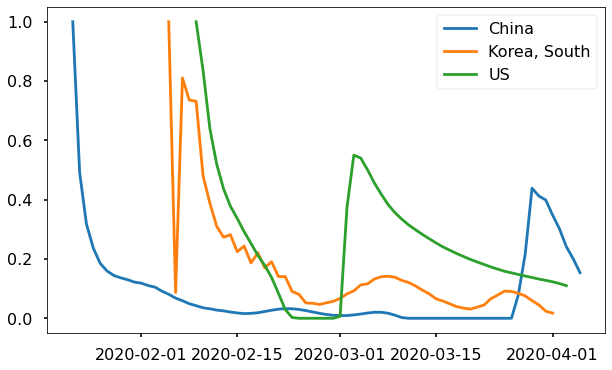

In [5]:
for ii, region in enumerate(['China','Korea, South','US']):
    N = data.get_population(region)
    smooth = True
    gamma = 0.07
    ifr = avg_ifr(region)
    
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    daily_cases = np.insert(np.diff(cum_cases),0,cum_cases[0])

    u0, offset, inf_dates, I, R, delta_I = \
            infer_initial_data(cum_deaths,data_start,ifr,gamma,N,method='deconvolution',extended_output=1)
    
    S = N - I - R
    beta_obs = delta_I*N/(I*S)
    if region=='Italy':
        start=25
    else:
        start=0
    plt.plot_date(data_dates[start:-offset],beta_obs[start:-offset],'-',label=region)
    
    plt.legend()

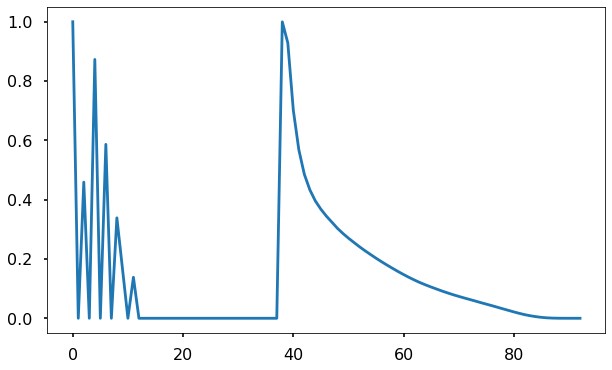

In [5]:
plt.plot(delta_I/I)

In [35]:
region = 'Saudi Arabia'
N = data.get_population(region)
smooth = True
gamma = 0.07
ifr = avg_ifr(region)
print(ifr)
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
data_start = mdates.date2num(data_dates[0])  # First day for which we have data
daily_cases = np.insert(np.diff(cum_cases),0,cum_cases[0])


u0, offset2, inf_dates2, inf_I2, inf_R2, inf_newI2 = \
        infer_initial_data(cum_deaths,data_start,ifr,gamma,N,method='deconvolution',extended_output=1)

0.002816891988643491


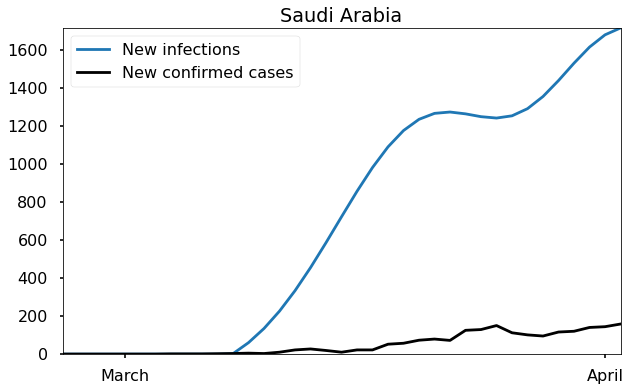

In [44]:
off = offset2+4
start = 35
plt.plot_date(inf_dates2[start:-off],inf_newI2[start:-off],'-')
plt.plot_date(data_dates[start:-off],daily_cases[start:-off]*1,'-k')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title(region);
ax.autoscale(enable=True, axis='both', tight=True)
#for ld in data.lockdown_start[region]:
#    lockdown_date = datetime.strptime(ld,'%m-%d-%Y')
#    plt.plot_date([lockdown_date,lockdown_date],plt.ylim(),'--k',alpha=0.5)
plt.legend(['New infections','New confirmed cases'])
plt.savefig('infections_'+region+'.pdf')
print()
#ax.set_yscale('log'); ax.set_ylim(10,1e5)
#plt.plot_date(inf_dates1[:-off],inf_I1[:-off])

In [29]:
off

21

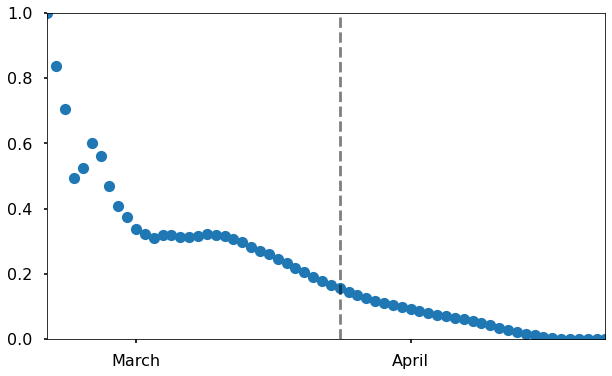

In [30]:
S = N - inf_I2 - inf_R2
beta_obs = inf_newI2*N/(inf_I2*S)
plt.plot_date(data_dates,beta_obs)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax.autoscale(enable=True, axis='both', tight=True)
for ld in data.lockdown_start[region]:
    lockdown_date = datetime.strptime(ld,'%m-%d-%Y')
    plt.plot_date([lockdown_date,lockdown_date],plt.ylim(),'--k',alpha=0.5)

In [7]:
len(data_dates)

93

In [8]:
data_dates[0]

Timestamp('2020-01-22 00:00:00', freq='D')

(0.0, 1.0)

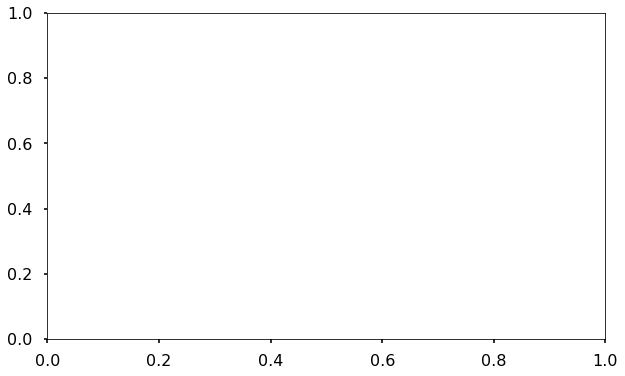

In [15]:
plt.ylim()

In [8]:
plt.plot_date([lockdown_date,lockdown_date],[0,60000],'--')
plt.plot_date(data_dates[:-off],daily_cases[:-off]*1,'-')


ValueError: view limit minimum -36875.8 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

datetime.datetime(2020, 3, 9, 0, 0)

In [ ]:
datetime

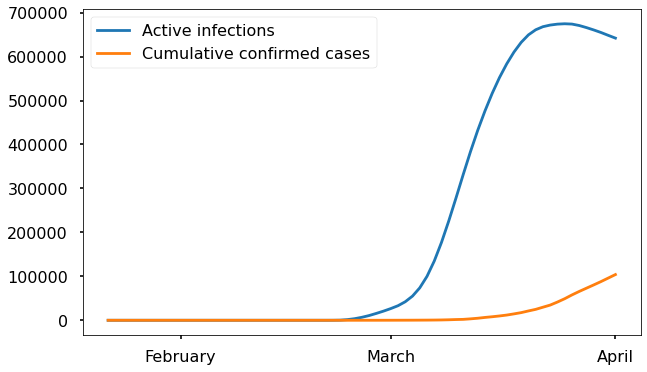

In [65]:
off = offset2#int(round(0.5*(offset1+offset2)))
plt.plot_date(inf_dates2[:-off],inf_I2[:-off],'-')
plt.plot_date(data_dates[:-off],cum_cases[:-off]*1,'-')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.legend(['Active infections','Cumulative confirmed cases'])
#ax.set_yscale('log'); ax.set_ylim(10,1e6)


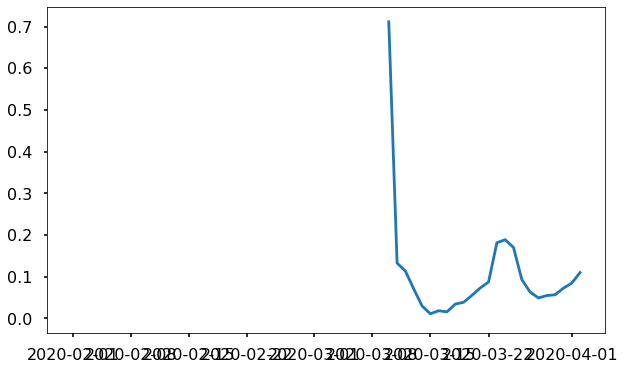

In [42]:
daily_detection_rate = daily_cases/inf_newI2
plt.plot_date(data_dates[:-off],daily_detection_rate[:-off],'-')

(0.0, 0.4)

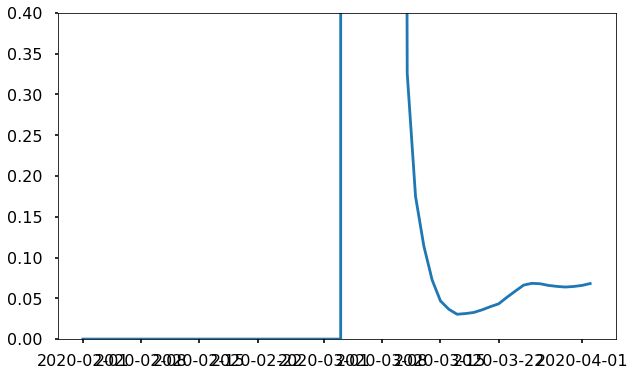

In [46]:
cdr = np.cumsum(daily_cases)/np.cumsum(inf_newI2)
plt.plot_date(data_dates[:-off],cdr[:-off],'-')
plt.ylim(0,0.4)

(0.0, 0.1)

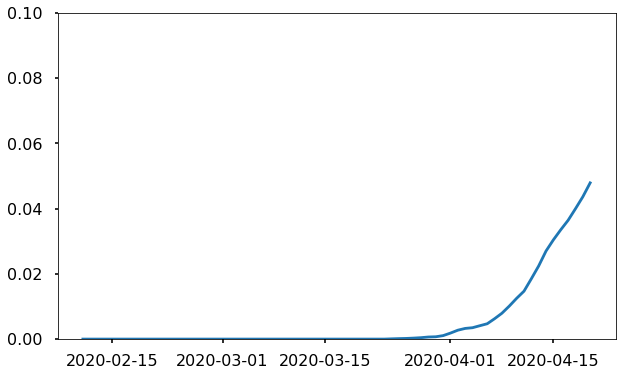

In [44]:
lag = 20
cdr_lagged = np.cumsum(daily_cases)[:-lag]/np.cumsum(inf_newI2)[lag:]
plt.plot_date(data_dates[lag:],cdr_lagged,'-')
plt.ylim(0,0.1)

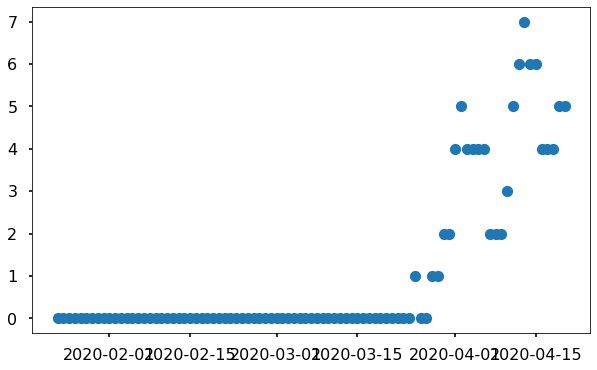

In [45]:
plt.plot_date(data_dates[1:],np.diff(cum_deaths))

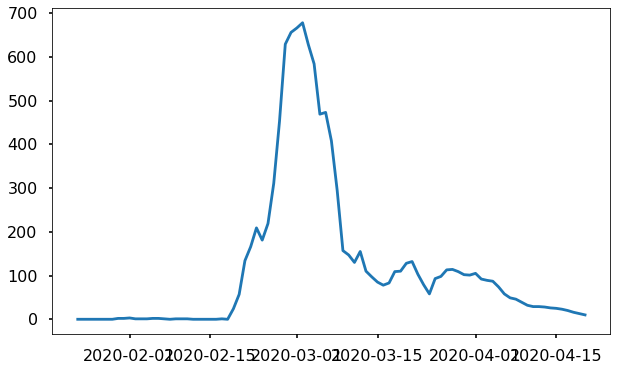

In [145]:
plt.plot(data_dates[1:],np.diff(cum_cases))

In [146]:
cum_deaths[-1]/cum_cases[-1]

0.020582706766917293

In [99]:
print(offset1,offset2)

19 26


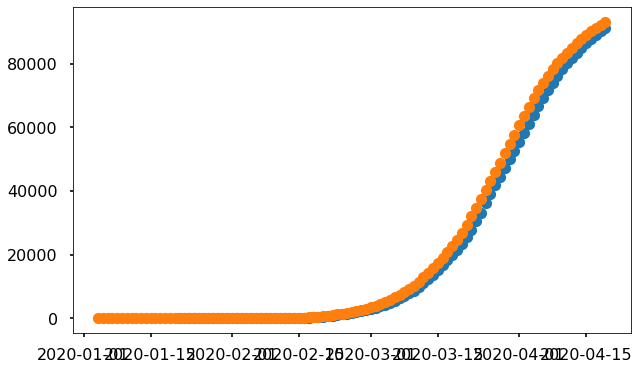

In [42]:
plt.plot_date(inf_dates2,inf_R2)
plt.plot_date(inf_dates1[:],inf_R1[:])

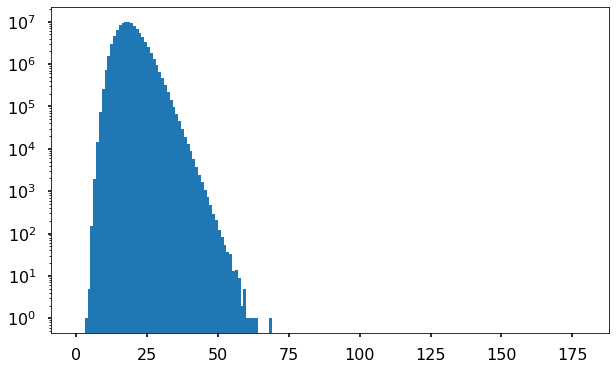

In [19]:
deconvolution.generate_pdf(mu1=4.,mu2=15.)

In [9]:
from scipy import stats

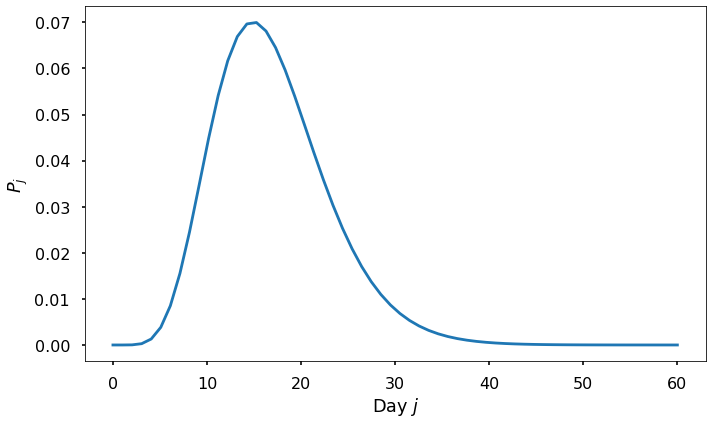

In [20]:
mean = 17
shape = 8.
scale = 17/shape
t = np.linspace(0,60,60)
pdf = stats.gamma.pdf(t,shape,0,scale)
plt.plot(t,pdf)
plt.xlabel('Day $j$')
plt.ylabel('$P_j$')
plt.tight_layout()
plt.savefig('ttd.pdf')

In [23]:
deconvolution.get_offset(pdf,threshold=0.04)

28

In [12]:
np.sum(t*pdf)/np.sum(pdf)

16.999907864029332

In [13]:
scale

2.125

In [14]:
stats.gamma.pdf(10,6.,0,17/6.)

0.04723116676484657

In [24]:
mean, var = stats.gamma.stats(8, loc=0, scale=17/8, moments='mv')
print(mean,np.sqrt(var))

17.0 6.010407640085654


In [2]:
pdf = deconvolution.generate_pdf()

416